<a href="https://colab.research.google.com/github/LaaraibAhmed/randoms/blob/main/DIPLAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

filename='/content/bright.tif'
img=Image.open(filename)
im=img.convert('L')
im_array=np.array(im)
print(im.size)
im_array

(500, 500)


array([[132, 132, 132, ..., 191, 191, 184],
       [132, 132, 132, ..., 190, 190, 179],
       [132, 132, 132, ..., 175, 175, 166],
       ...,
       [149, 132, 132, ..., 248, 242, 242],
       [151, 138, 132, ..., 242, 242, 235],
       [156, 145, 132, ..., 240, 240, 224]], dtype=uint8)

In [19]:
new_array=im_array.flatten()
new_array

array([132, 132, 132, ..., 240, 240, 224], dtype=uint8)

In [25]:
count_array=np.bincount(new_array,minlength=256)

In [26]:
sum=np.sum(count_array)
pdf=count_array/sum

In [27]:
cdf=np.cumsum(pdf)

In [28]:
eqhist=np.floor(cdf*255).astype(np.uint8)

In [40]:
def transform(x):
  return eqhist[x]

eqim=map(transform,new_array)
eq_im=np.array(list(eqim))
eq_im.size

250000

(array([18320.,     0.,  1750.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  9441.,     0.,  1642.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        16457.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 10381.,     0.,     0.,  2945.,
            0.,     0.,     0.,     0.,     0.,     0.,  6149.,  1038.,
            0.,     0.,     0.,     0.,  4566.,   961.,     0.,     0.,
            0.,  4562.,     0.,     0.,     0.,  2446.,     0.,  2641.,
            0.,     0.,     0.,     0.,     0.,  5860.,     0.,  1861.,
            0.,     0.,     0.,     0.,  3850.,     0.,  2016.,     0.,
            0.,     0.,     0.,  4290.,     0.,     0.,     0.,  3081.,
            0.,     0.,     0.,     0.,     0.,  6031.,     0.,     0.,
         2830.,     0.,     0.,     0.,     0.,     0.,  4868., 

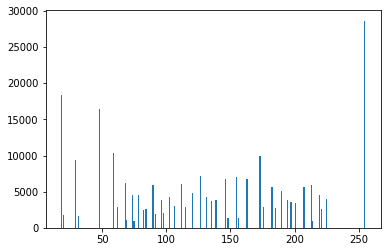

In [42]:
eq_img_array=eq_im.reshape(im.size)
plt.hist(eq_img_array.flatten(),bins=256)

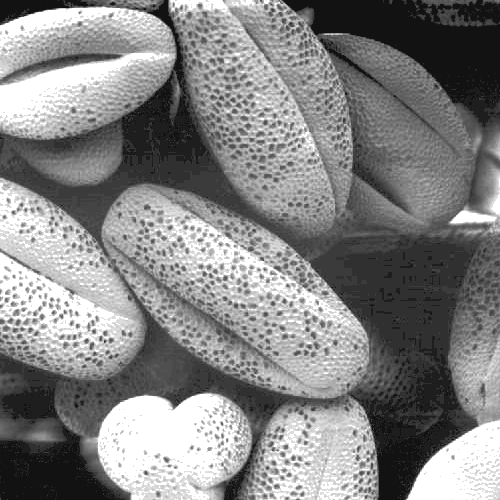

In [44]:
newimg=Image.fromarray(eq_img_array)
newimg